# 1. Introduction to SVM

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

# 2. Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3. About the Cancer data

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepositor...] 

Public Source - https://s3-api.us-geo.objectstorage.s...

In this example, we are using a dataset that has a 10 predictors(columns) in each record, 700 records (rows).

### row = record
### column = attribute /dimension
### target = prediction

# 4. Load data from CSV file

The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [2]:
cell_df = pd.read_csv('E:\cell_samples.csv')
#First 5 rows of the dataframe
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#Last 5 rows of the dataframe
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [4]:
#some details about dataframe
print("Shape of the dataframe : ",cell_df.shape)
print("Size of the data frame(in Bytes) : ",cell_df.size)
print("\nTotal records in each column : ")
cell_df.count()

Shape of the dataframe :  (699, 11)
Size of the data frame(in Bytes) :  7689

Total records in each column : 


ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

# 5. Distribution of the classes

In [5]:
#Distribution of target column
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

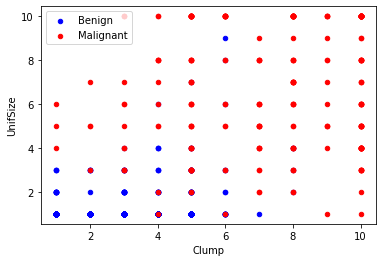

In [6]:
benign_df = cell_df[cell_df['Class'] == 2]
malignant_df = cell_df[cell_df['Class'] == 4]

#Plot function return two axes(x and y). I we want to plot two type of data into same graph. we have to use ax parameter.
#help(benign_df.plot)
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)

# Identifying unwanted rows

In [7]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# 7. Remove unwanted columns

In [9]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [10]:
feature_df = cell_df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']]

# cell_df -> 100 rows and 11 columns,
# Picked 9 columns out of 11

#Independent variables
X = np.asarray(feature_df)

#Dependent variables
y = np.asarray(cell_df['Class'])

In [11]:
X

array([[1000025,       5,       1, ...,       1,       1,       2],
       [1002945,       5,       4, ...,       2,       1,       2],
       [1015425,       3,       1, ...,       1,       1,       2],
       ...,
       [ 888820,       5,      10, ...,      10,       2,       4],
       [ 897471,       4,       8, ...,       6,       1,       4],
       [ 897471,       4,       8, ...,       4,       1,       4]],
      dtype=int64)

In [12]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

# 8. Divide the data as Train/Test dataset

In [13]:
'''
cell_df (100) --> Train (80 rows) /Test (20 rows)
Train(X,y) --> X itself is a 2D array and y is 1D array itself
Test(X,y)
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
#Checking dimensions of the train and test dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 11), (137, 11), (546,), (137,))

# 9. Modeling(SVM with scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as  the kernel function, and can be  of different types, susch as:

    1. Linear
    2. Polynomial
    3. Radial Basis Function(RBF)
    4. Sigmoid
Each of these function has its characterstics, its, pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose  different functions in turn and compare the results. Let's just use the default, RBF(Radial Basis Function) for this lab.

In [14]:
from sklearn import svm

'''
kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
 |
 |     Current default is 'auto' which used (1 / n_features),
 |     if ``gamma='scale'`` is passed then it used 1 / (n_features * X.var())
 |     as value of gamma
'''

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

# 10. Evaluation (Results)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

print("Accuracy : ",accuracy_score(y_test, y_predict))
#print("Precision : ",precision_score(y_test, y_predict))
#print("Recall : ", recall_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

Accuracy :  0.6861313868613139
              precision    recall  f1-score   support

           2       0.68      0.99      0.81        90
           4       0.83      0.11      0.19        47

    accuracy                           0.69       137
   macro avg       0.76      0.55      0.50       137
weighted avg       0.73      0.69      0.59       137

[[89  1]
 [42  5]]
